# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [34]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType, EstType)
from lib import (curve, single_var, perform_est)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [3]:
npts = 2**10

## Power Spectrum Simulation H=0.8

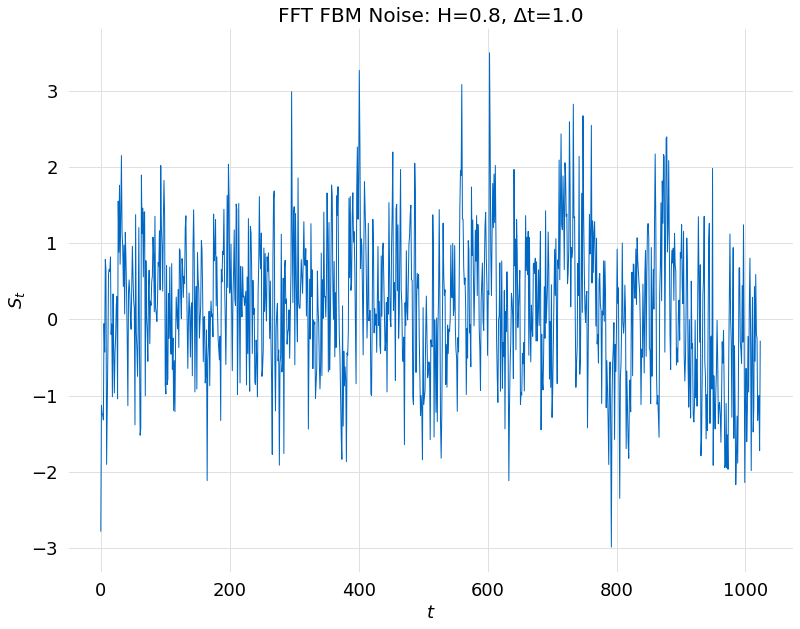

In [46]:
H = 0.8
fbm = DataSource.create_source_type(SourceType.FBM_NOISE_FFT, H=H, npts=npts)
curve(fbm, lw=1, data_type=DataType.TIME_SERIES)

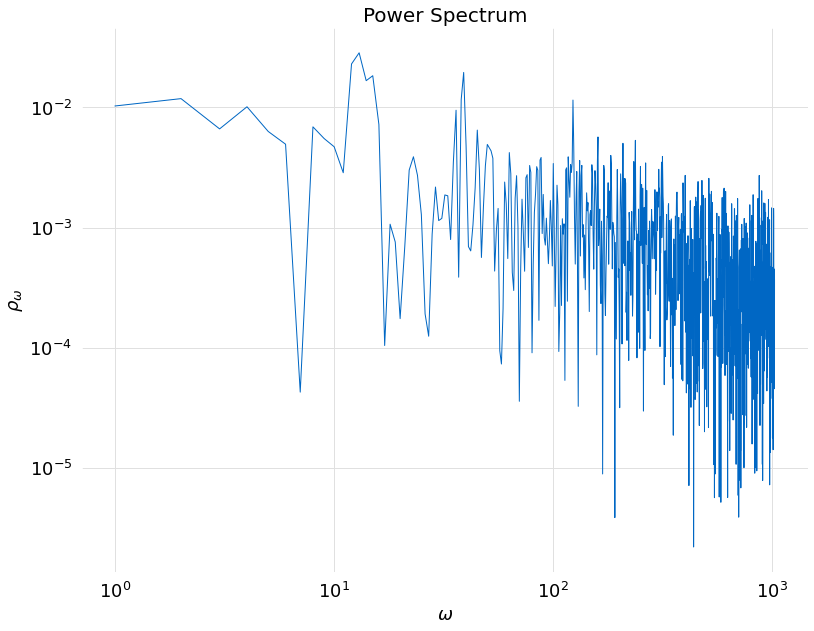

In [47]:
fbm = DataFunc.apply_func_type(fbm, DataType.PSPEC, npts=npts)
curve(fbm, data_type=DataType.PSPEC, lw=1, plot_type=PlotType.LOG)

In [48]:
results = perform_est(fbm, EstType.PERGRAM, data_type=DataType.PSPEC)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Power Spectrum   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     256.2
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.26e-51
Time:                        08:52:36   Log-Likelihood:                -835.76
No. Observations:                1023   AIC:                             1676.
Df Residuals:                    1021   BIC:                             1685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7263      0.105    -16.493      0.000      -1.932      -1.521
Frequency     -0.6413      0.040    -16.007      0.000      -0.720      -0.563
==============================================================================
Omnibus:                      135.049   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.333
Skew:                          -0.943   Prob(JB):                     2.33e-43
Kurtosis:                       4.024   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
fbm.attrs

{'S(t)': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'Date': '25/05/2022 08:52:25',
 'Name': 'FFT-FBM-Noise-Simulation-769174d4-6339-47cf-90da-d42b04bec563',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Power Spectrum': {'npts': 1024,
  'DataType': <DataType.PSPEC: 'PSPEC'>,
  'Parameters': {},
  'Description': 'Power Spectrum',
  'ylabel': '$\\rho_\\omega$',
  'xlabel': '$\\omega$',
  'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'PERGRAM': {'Type': <EstType.PERGRAM: 'PERGRAM'>,
    'Regression Type': <RegType.LOG: 2>,
    'Constant': {'Estimate': -1.72629566204105,
     'Error': 0.10467130561737843,
     'Estimate Label': '$\\hat{\\alpha}$',
     'Err

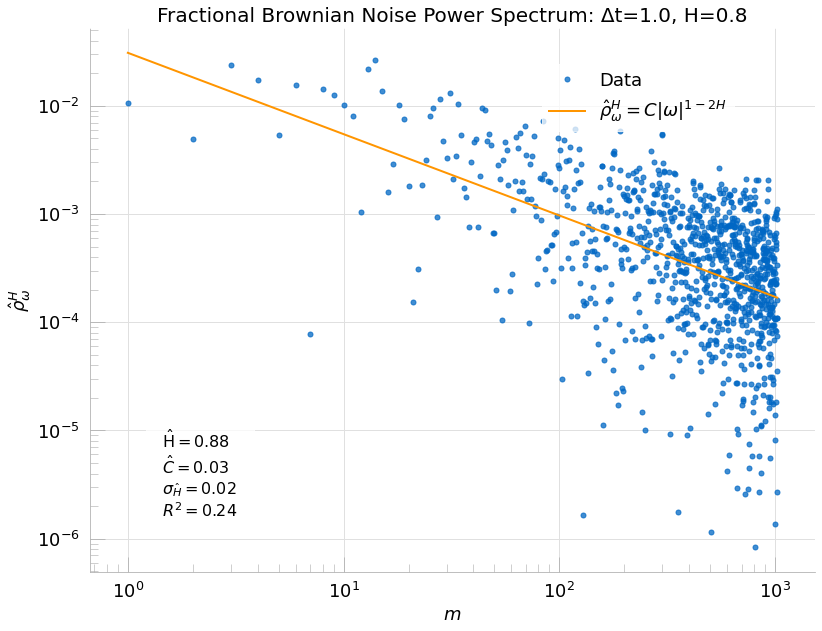

In [6]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
reg(ps, ω, results, title=title, plot_type=RegPlotType.FBM_PSPEC)

## Power Spectrum Simulation H=0.3

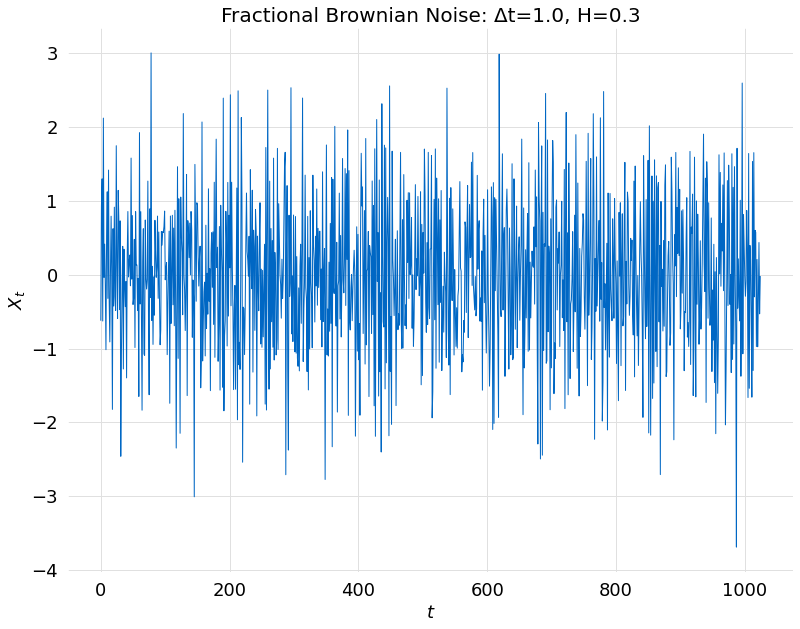

In [7]:
H = 0.3
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
curve(samples[:npts], title=title, lw=1, plot_type=DataPlotType.TIME_SERIES)

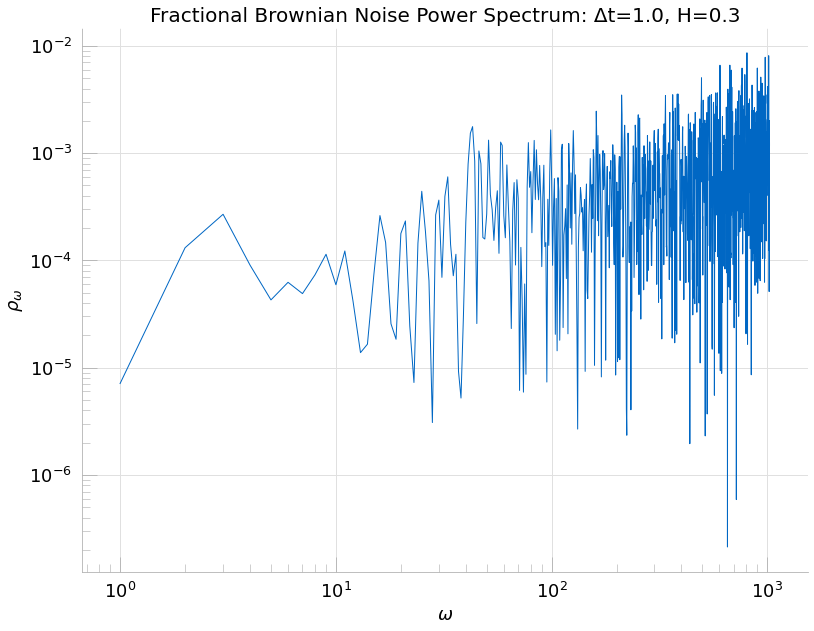

In [8]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
curve(ps, x=ω, title=title, plot_type=DataPlotType.PSPEC, lw=1)

In [9]:
results = stats.OLS_fit(ps, ω, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     166.6
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           2.00e-35
Time:                        16:54:34   Log-Likelihood:                -921.30
No. Observations:                1023   AIC:                             1847.
Df Residuals:                    1021   BIC:                             1856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7780      0.114    -41.980      0.000      -5.001      -4.555
x1             0.5623      0.044     12.909      0.000       0.477       0.648
==============================================================================
Omnibus:                      236.242   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.320
Skew:                          -1.244   Prob(JB):                    3.16e-120
Kurtosis:                       5.592   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

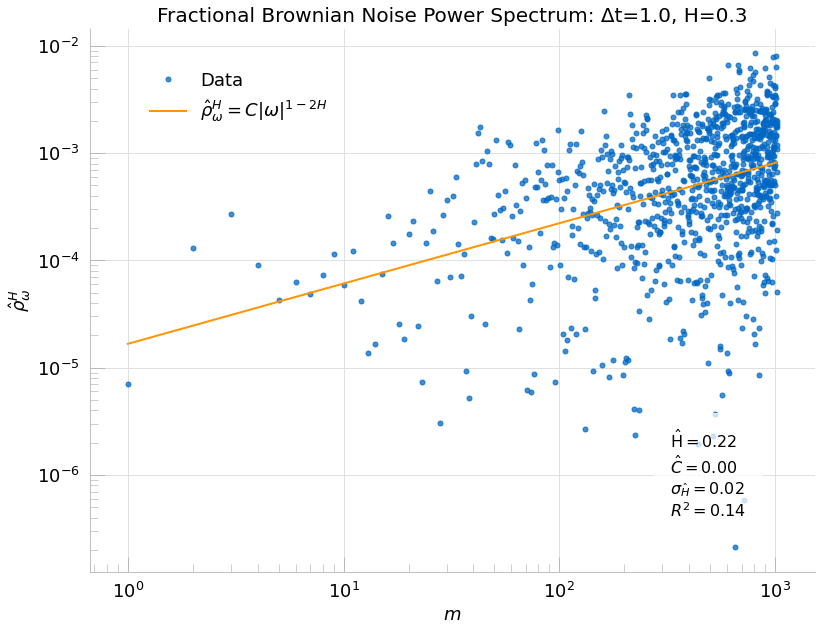

In [10]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
reg(ps, ω, results, title=title, plot_type=RegPlotType.FBM_PSPEC)